## Lists, dictionnaries and loops

### Find the max value in a list

In [2]:
mylist = [10, 8, 1, 60, 1, 4, 13]

In [3]:
max_value = 0
for x in mylist:
    if x > max_value:
        max_value = x
print(max_value)

60


### Create a list of the lengths of the words of a sentence
**Do it with a loop and with a comprehension list**

In [20]:
print(sentence)

lengths = []
for word in words:
    lengths.append(len(word))
print(lengths)

this is a correct sentence but this is not an interesting sentence
[4, 2, 1, 7, 8, 3, 4, 2, 3, 2, 11, 8]


In [22]:
lengths = [len(w) for w in words]
print(lengths)

[4, 2, 1, 7, 8, 3, 4, 2, 3, 2, 11, 8]


### From a sentence, create a dictionnary for which each label is each unique word of the sentence, and the value is the number of occurence of this word.

In [16]:
sentence = 'this is a correct sentence but this is not an interesting sentence'

words = sentence.split(' ')
print(words)


dic = {}
for word in words:
    if word in dic:
        dic[word]+=1
    else:
        dic[word]=1
        
print(dic)

['this', 'is', 'a', 'correct', 'sentence', 'but', 'this', 'is', 'not', 'an', 'interesting', 'sentence']
{'this': 2, 'is': 2, 'a': 1, 'correct': 1, 'sentence': 2, 'but': 1, 'not': 1, 'an': 1, 'interesting': 1}


### Create a function that takes two lists of integers and two integers and returns the concatenation of the two lists where each element is at the power of the corresponding integer.

```
list_a = [1,6,8list_a = [1,6,8]
list_b = [0,3]
power_a = 2
power_b = 3
```

`I want the function to return [1**2,6**2,8**2,0**3,3**3]`


In [23]:
def weird_function(la, lb, pa, pb):
    return [x**pa for x in la]+[x**pb for x in lb]

In [26]:
list_a = [1,6,8]
list_b = [0,3]
power_a = 2
power_b = 3
          
weird_function(list_a, list_b, power_a, power_b)

[1, 36, 64, 0, 27]

### Fix the power values to 2 using `lambda` to create a function that takes only two arguments (the two lists) 

In [27]:
smaller_weird_function = lambda x, y: weird_function(x,y,2,2) 

In [28]:
smaller_weird_function(list_a, list_b)

[1, 36, 64, 0, 9]

### Create an iterator that returns the square root of successive integers until a given value is reach

In [32]:
from numpy import sqrt

class Square_root_iterator:
    def __init__(self, max_value):
        self.max_value = max_value
        self.counter = 0
    def __iter__(self):
        return self
    def __next__(self):
        square_root = sqrt(self.counter)
        if square_root >= self.max_value:
            raise StopIteration
        else:
            self.counter +=1
            return square_root

In [33]:
for value in Square_root_iterator(3):
    print(value)

0.0
1.0
1.4142135623730951
1.7320508075688772
2.0
2.23606797749979
2.449489742783178
2.6457513110645907
2.8284271247461903


### Exercise


Goal:  **Generate a low spatial frequency random pattern**

Steps:
1. Generate a 200 by 200 real image with a normal distribution,
2. Calculate the DFT,
3. Filter the hight spatial frequencies using a circular mask,
3. Do the inverse DFT,
4. Display the original image, the DFT, the mask and the final image with subplot.

<IPython.core.display.Javascript object>


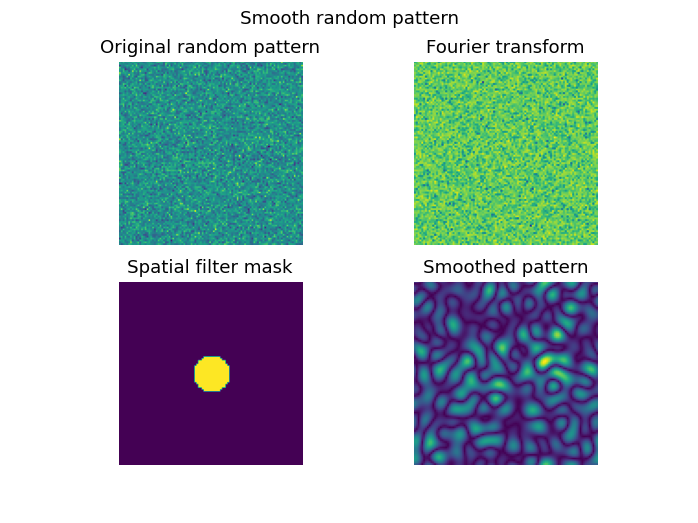

(-0.5, 99.5, 99.5, -0.5)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

n = 100
cutoff = 10

# initial random image
Img0 = np.random.randn(n,n)

# calculate Fourier transform
TF = np.fft.fftshift(np.fft.fft2(Img0))

# create the low-pass filter mask: 
# just a disk of radius cutoff in the spatial frequency domain
X,Y = np.meshgrid(np.arange(-n//2,n//2),np.arange(-n//2,n//2))
mask = X**2+Y**2 < cutoff**2

# filter the Fourier transform of the image
TF_filtered = mask*TF

# inverse Fourier transform
Img_final = np.fft.ifft2(np.fft.fftshift(TF_filtered))

plt.figure()
plt.suptitle('Smooth random pattern')
plt.subplot(221)
plt.title('Original random pattern')
plt.axis('off')
plt.imshow(Img0)
plt.subplot(222)
plt.title('Fourier transform')
plt.imshow(np.log(np.abs(TF)))
plt.axis('off')
plt.subplot(223)
plt.title('Spatial filter mask')
plt.imshow(mask)
plt.axis('off')
plt.subplot(224)
plt.title('Smoothed pattern')
plt.imshow(np.abs(Img_final))
plt.axis('off')